Momento de Retroalimentación: Módulo 2 Implementación de una técnica de aprendizaje máquina sin el uso de un framework. (Portafolio Implementación).

Link al documento del reporte escrito: [Reporte preliminar](https://docs.google.com/document/d/1_4Veqd4stUotideEh4BgP8AjQpYAAqiO/edit?usp=sharing&ouid=114849935084064003871&rtpof=true&sd=true)


Fabián Erubiel Rojas Yañez
A01706636

In [1]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
%cd "/content/gdrive/MyDrive/Colab Notebooks"
!ls  # show current directory

import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/bank_preprocessedV3.csv')

/content/gdrive/MyDrive/Colab Notebooks
 07-Septiembre.ipynb
 31deagosto.ipynb
 Actividad3SemTec.ipynb
 Act-K-means.ipynb
 Act-regresion.ipynb
 ActVisualizacion.ipynb
 AirQualityUCI.csv
 AirQualityUCI.xlsx
 ATCEstadisticaBasica.ipynb
 bank.csv
 bank-full.csv
 bank_preprocessed.csv
 bank_preprocessedV2.csv
 bank_preprocessedV3.csv
 BuenoEntrega1_SinFramework.ipynb
 car.data
 CArDataset.ipynb
'Copia de Act-K-means.ipynb'
'Copia de ActVisualizacion.ipynb'
'Copia de ATCEstadisticaBasica (1).ipynb'
'Copia de ATCEstadisticaBasica.ipynb'
'Copia de Dataset'
 CopiadeEnsembleMethod_RandomForest.ipynb
'Copia de Entrega1_SinFramework.ipynb'
'Copia de Forest.ipynb'
'Copia de Hierarchical Clustering.ipynb'
'Copia de HW1_DSP_DFT-1.ipynb'
'Copia de io2023_workshop (1).ipynb'
'Copia de io2023_workshop.ipynb'
'Copia de KMeans sklearn blobs.ipynb'
'Copia de KMeans sklearn pipeline Cancer Genome Dataset.ipynb'
'Copia de KMeans vs DBSCAN  sklearn moons evaluation ari metric .ipynb'
'Copia de Loading Data s

Perdida/Costo 0: 0.6930241499667426, Precisión: 0.49746011304285614
Perdida/Costo 100: 0.4870321804685597, Precisión: 0.7887779924161122
Perdida/Costo 200: 0.4595428930616649, Precisión: 0.7937862202189311
Perdida/Costo 300: 0.44934427057836285, Precisión: 0.7976497102382486
Perdida/Costo 400: 0.44413208412287025, Precisión: 0.8008156256707448
Perdida/Costo 500: 0.4410388498862951, Precisión: 0.8034270587393575
Perdida/Costo 600: 0.43902747468076253, Precisión: 0.8047506618015311
Perdida/Costo 700: 0.43763172377211695, Precisión: 0.805340917221149
Perdida/Costo 800: 0.4366138460823453, Precisión: 0.806020605280103
Perdida/Costo 900: 0.4358419845541333, Precisión: 0.8063246762538456
Perdida/Costo 1000: 0.4352382521485959, Precisión: 0.8064319954210488
Perdida/Costo 1100: 0.4347542045673491, Precisión: 0.8067539529226586
Perdida/Costo 1200: 0.43435834065482215, Precisión: 0.8068612720898619
Perdida/Costo 1300: 0.43402935876645327, Precisión: 0.8066466337554554
Perdida/Costo 1400: 0.43375

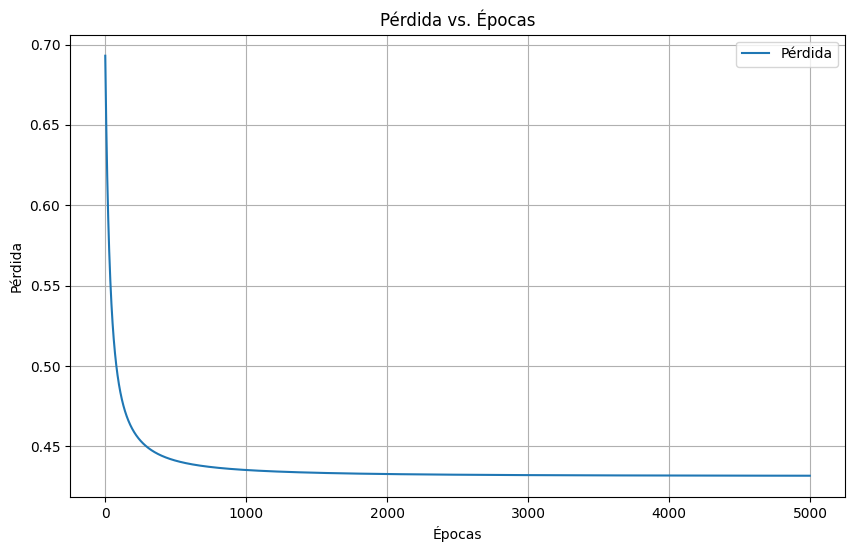

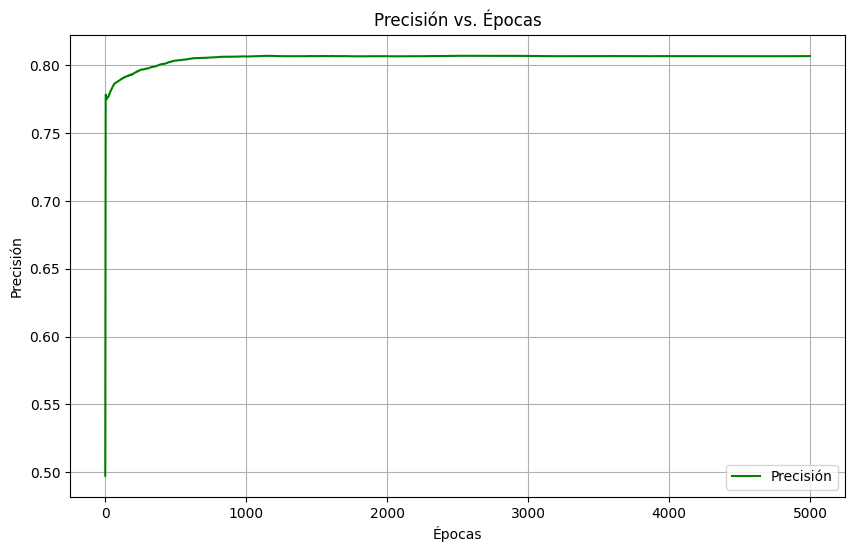

Reporte de Métricas:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92     11968
           1       0.46      0.63      0.53      1595

    accuracy                           0.87     13563
   macro avg       0.70      0.77      0.73     13563
weighted avg       0.89      0.87      0.88     13563



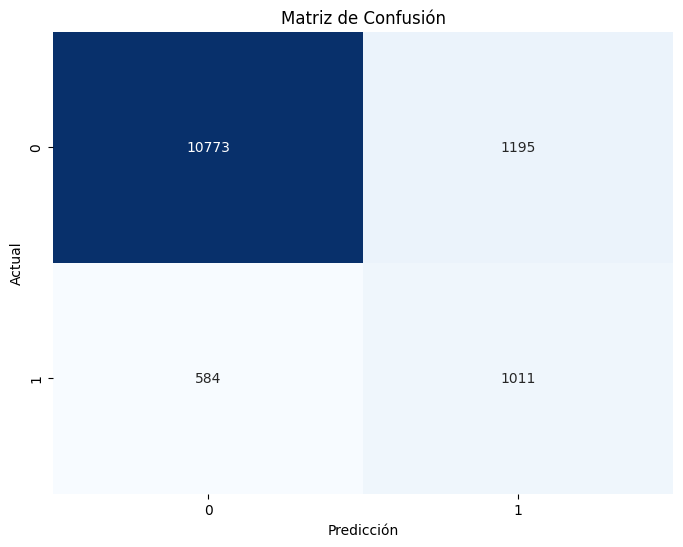

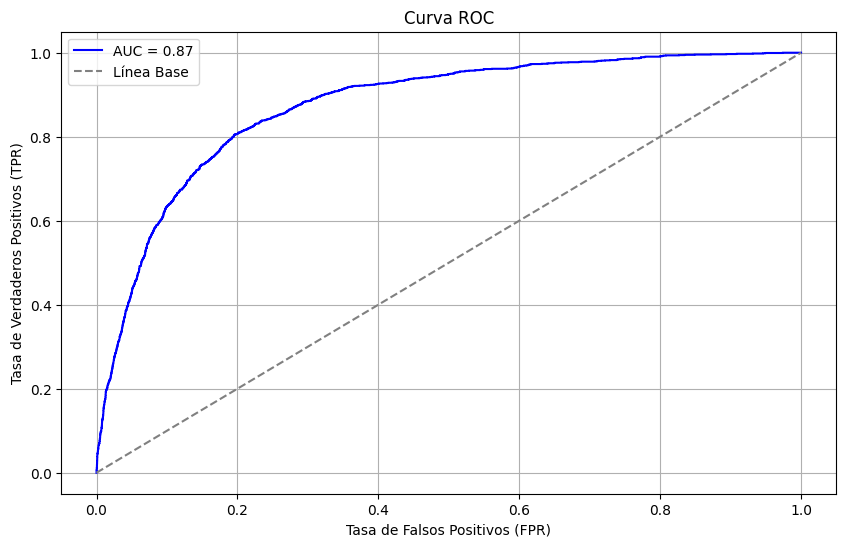

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from imblearn.over_sampling import SMOTE

#Inicialización de parámetros con valores pequeños y aleatorios
def initialize_parameters(n_features):
    np.random.seed(0)
    weights = np.random.randn(n_features) * 0.01
    bias = 0.0
    return weights, bias

#Función de activación sigmoide
def sigmoid_activation(z):
    z = np.clip(z, -500, 500)  #Limitar los valores de z para evitar overflow
    return 1 / (1 + np.exp(-z))

#Función cross entropy
def calculate_cost(y_true, y_pred):
    m = len(y_true)
    cost = -(1/m) * np.sum(y_true * np.log(y_pred + 1e-15) + (1 - y_true) * np.log(1 - y_pred + 1e-15))
    return cost

#Función para calcular la precisión
def calculate_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

#Algoritmo de optimización
def gradient_optimization_with_metrics(X, y, weights, bias, learning_rate, num_iterations):
    m = X.shape[0]
    loss_history = []
    accuracy_history = []
    for i in range(num_iterations):
        #Predicción
        z = np.dot(X, weights) + bias
        y_pred = sigmoid_activation(z)
        #Cálculo del gradiente
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)
        #Actualización de los parámetros
        weights -= learning_rate * dw
        bias -= learning_rate * db
        #Almacenar la función de costo y precisión
        cost = calculate_cost(y, y_pred)
        loss_history.append(cost)
        y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
        accuracy = calculate_accuracy(y, y_pred_binary)
        accuracy_history.append(accuracy)
        #Imprimir el costo cada 100 iteraciones
        if i % 100 == 0:
            print(f"Perdida/Costo {i}: {cost}, Precisión: {accuracy}")
    return weights, bias, loss_history, accuracy_history

#Función para hacer predicciones
def make_predictions(X, weights, bias, threshold=0.7):
    z = np.dot(X, weights) + bias
    y_pred = sigmoid_activation(z)
    return [1 if i >= threshold else 0 for i in y_pred]

#Función para dividir los datos en entrenamiento y prueba manualmente
def manual_train_test_split(X, y, test_size=0.3, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    test_size = int(len(indices) * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

#Preparar las variables dependientes e independientes
X = df.drop(columns=['y']).values  # Excluir la columna objetivo 'y'
y = df['y'].values  # Variable objetivo

#Convertir X a tipo float64
X = X.astype(np.float64)

#Dividir los datos en conjuntos de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = manual_train_test_split(X, y, test_size=0.3, random_state=0)

#Aplicar SMOTE al conjunto de entrenamiento para balancear las clases
smote = SMOTE(random_state=0)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

#Configurar los hiperparámetros
learning_rate = 0.1
num_iterations = 5000

#Inicializar los pesos y el bias
n_features = X_train_res.shape[1]
weights, bias = initialize_parameters(n_features)

#Entrenar el modelo
weights, bias, loss_history, accuracy_history = gradient_optimization_with_metrics(
    X_train_res, y_train_res, weights, bias, learning_rate, num_iterations
)

#Graficar la función de pérdida vs épocas
plt.figure(figsize=(10, 6))
plt.plot(range(len(loss_history)), loss_history, label="Pérdida")
plt.title("Pérdida vs. Épocas")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()
plt.grid(True)
plt.show()

#Graficar la precisión vs épocas
plt.figure(figsize=(10, 6))
plt.plot(range(len(accuracy_history)), accuracy_history, label="Precisión", color="green")
plt.title("Precisión vs. Épocas")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()
plt.grid(True)
plt.show()

#Realizar predicciones en el conjunto de prueba
y_pred_test = make_predictions(X_test, weights, bias, threshold=0.7)

#Calcular y mostrar el reporte de métricas
print("Reporte de Métricas:")
print(classification_report(y_test, y_pred_test))

#Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_test)

#Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Actual")
plt.show()

# Calcular la curva ROC y AUC
y_pred_proba = sigmoid_activation(np.dot(X_test, weights) + bias)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Línea Base")
plt.title("Curva ROC")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import pandas as pd

#Función para ingresar los datos manualmente
def input_data_manual():
    #Diccionario para almacenar los valores de entrada
    user_data = {}

    #Variables binarias
    while True:
        value = input("¿Tienes hipoteca? (1: Sí, 0: No): ")
        try:
            value = int(value)
            if value in [0, 1]:
                user_data["housing"] = value
                break
            else:
                print("Por favor ingresa 1 para Sí o 0 para No.")
        except ValueError:
            print("Entrada inválida. Por favor ingresa 1 o 0.")

    while True:
        value = input("¿Tienes préstamo personal? (1: Sí, 0: No): ")
        try:
            value = int(value)
            if value in [0, 1]:
                user_data["loan"] = value
                break
            else:
                print("Por favor ingresa 1 para Sí o 0 para No.")
        except ValueError:
            print("Entrada inválida. Por favor ingresa 1 o 0.")

    #Datos categóricos
    jobs = ["Management", "Other", "Student", "Technical", "Unemployed", "Unskilled"]
    print("\nOpciones de empleo:")
    for i, job in enumerate(jobs, 1):
        print(f"{i}: {job}")

    while True:
        selected_job = input("Selecciona tu empleo (ingresa solo el número): ")
        try:
            selected_job = int(selected_job)
            if selected_job in range(1, len(jobs) + 1):
                break
            else:
                print(f"Por favor ingresa un número entre 1 y {len(jobs)}.")
        except ValueError:
            print("Entrada inválida. Por favor ingresa un número válido.")

    #Asignar 1 al empleo seleccionado y 0 a los demás empleos
    for i, job in enumerate(jobs, 1):
        user_data[f"job_{job}"] = (i == selected_job)

    #Preguntar el balance anual (sueldo en euros)
    while True:
        balance = input("Ingresa tu balance anual (sueldo en euros): ")
        try:
            balance = float(balance)
            user_data["balance_winsorized"] = balance
            break
        except ValueError:
            print("Entrada inválida. Por favor ingresa un número decimal.")

    #Preguntar al cleinte si ha tenido contactos previos
    while True:
        has_previous_contacts = input("¿Has tenido contactos previos con el banco? (1: Sí, 0: No): ")
        try:
            has_previous_contacts = int(has_previous_contacts)
            if has_previous_contacts in [0, 1]:
                break
            else:
                print("Por favor ingresa 1 para Sí o 0 para No.")
        except ValueError:
            print("Entrada inválida. Por favor ingresa 1 o 0.")

    if has_previous_contacts == 1:
        #Si el cliente ha tenido contactos previos, preguntar detalles.
        while True:
            value = input("¿Cuántos contactos previos has tenido con el banco? ")
            try:
                value = int(value)
                user_data["contact_prev"] = value
                break
            except ValueError:
                print("Entrada inválida. Por favor ingresa un número entero.")

        while True:
            value = input("Duración total de los contactos previos (en segundos): ")
            try:
                value = float(value)
                user_data["duration_winsorized"] = value
                break
            except ValueError:
                print("Entrada inválida. Por favor ingresa un número decimal.")

        while True:
            value = input("¿Cuántos de esos contactos fueron exitosos? ")
            try:
                value = float(value)
                user_data["previous_winsorized"] = value
                break
            except ValueError:
                print("Entrada inválida. Por favor ingresa un número decimal.")

        #Recopilar informacion sobre los contatos previos establecidos
        outcomes = ["failure", "other", "success", "unknown"]
        print("\nSelecciona el resultado previo de la campaña:")
        for i, outcome in enumerate(outcomes, 1):
            print(f"{i}: {outcome}")

        while True:
            selected_outcome = input("Elije una opción (número): ")
            try:
                selected_outcome = int(selected_outcome)
                if selected_outcome in range(1, len(outcomes) + 1):
                    break
                else:
                    print(f"Por favor ingresa un número entre 1 y {len(outcomes)}.")
            except ValueError:
                print("Entrada inválida. Por favor ingresa un número válido.")

        #Asignar 1 al resultado seleccionado y 0 a los demás
        for i, outcome in enumerate(outcomes, 1):
            user_data[f"poutcome_{outcome}"] = (i == selected_outcome)
    else:
        #Si no tiene contactos previos, establecer las demas preguntas en 0
        user_data["contact_prev"] = 0
        user_data["duration_winsorized"] = 0.0
        user_data["previous_winsorized"] = 0.0
        outcomes = ["failure", "other", "success", "unknown"]
        for outcome in outcomes:
            user_data[f"poutcome_{outcome}"] = False

    #Convertir a DataFrame
    user_df = pd.DataFrame([user_data])
    return user_df


user_df = input_data_manual()

#Reorganizar las columnas de user_df para que coincidan con las del dataframe X
columns_X = ['housing', 'loan', 'job_Management', 'job_Other', 'job_Student',
             'job_Technical', 'job_Unemployed', 'job_Unskilled',
             'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown',
             'contact_prev', 'balance_winsorized', 'duration_winsorized', 'previous_winsorized']

#Reorganizar user_df igual que el datframe X
user_df = user_df[columns_X]

#Convertir a formato NumPy
user_input = user_df.values.astype(np.float64)

#Probar el modeo con los datos ingresados del usuario
user_prediction = make_predictions(user_input, weights, bias, threshold=0.7)

#Mostrar resultados
if user_prediction[0] == 1:
    print("El modelo predice que el cliente SI SE SUSCRIBIRÁ un depósito a plazo con el banco.")
else:
    print("El modelo predice que el cliente NO SE SUSCRIBIRÁ a un depósito a plazo con el banco.")

¿Tienes hipoteca? (1: Sí, 0: No): 1
¿Tienes préstamo personal? (1: Sí, 0: No): 0

Opciones de empleo:
1: Management
2: Other
3: Student
4: Technical
5: Unemployed
6: Unskilled
Selecciona tu empleo (ingresa solo el número): 3
Ingresa tu balance anual (sueldo en euros): 30000
¿Has tenido contactos previos con el banco? (1: Sí, 0: No): 1
¿Cuántos contactos previos has tenido con el banco? 2
Duración total de los contactos previos (en segundos): 300
¿Cuántos de esos contactos fueron exitosos? 1

Selecciona el resultado previo de la campaña:
1: failure
2: other
3: success
4: unknown
Elije una opción (número): 2
El modelo predice que el cliente SI SE SUSCRIBIRÁ un depósito a plazo con el banco.
